In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [119]:
import os 
result = pd.DataFrame()
training_sets = os.listdir("../eval_mtl_results/")
bad_data = ["haberman.csv", "german.csv", 
            #"balance-scale.csv",
            "arrhythmia.csv", 
            "heart-statlog.csv", 
            "sonar.csv", 
            "tae.csv", 
           # "vehicle.csv"
           ]


for training_set in training_sets:
    runs = os.listdir(f"../eval_mtl_results/{training_set}/")
    for run in runs:
        approaches = os.listdir(f"../eval_mtl_results/{training_set}/{run}")
        for approach in approaches:
            datasets = os.listdir(f"../eval_mtl_results/{training_set}/{run}/{approach}")
            for dataset in datasets:
                if dataset in bad_data:
                    continue
                df = pd.read_csv(f"../eval_mtl_results/{training_set}/{run}/{approach}/{dataset}")
                run_int = int(run.split("run_")[-1])
                if run_int > 0:
                    continue
                df["Method"] = approach
                df["dataset"] = dataset
                df["training_set"] = training_set

                #df = df[df["iteration"] <= 50]
                df["max_iteration"] = df["iteration"].max()
                df["run"] = run_int
                result = pd.concat([result, df],ignore_index=True)
result["Best NMI"] *= -1 * 100
result["Best ARI"] *= -1 * 100
all_except_largest_fmnist_data = [f"Fashion-MNIST_n{i}0000_f784_c10.csv" for i in range(1,7)]
#result = result[~result["dataset"].isin(all_except_largest_fmnist_data)]
result["algorithms"] = result["algorithms"].fillna("")
result["algorithms"] = result["algorithms"].astype(str)
algorithms = ["GMM", "MBKMeans", "KMeans", "birch", "ward", "dbscan"]
for algorithm in algorithms:
    result[algorithm] = 0
for algorithm in algorithms:
    result[algorithm] = result.apply(lambda x: 1 if algorithm in str(x["algorithms"]) else 0, axis=1)
max_iter_results = result.loc[result.groupby(["training_set", "Method", "dataset", "run"])["iteration"].idxmax()]

In [27]:
all_except_largest_fmnist_data

['Fashion-MNIST_n10000_f784_c10.csv',
 'Fashion-MNIST_n20000_f784_c10.csv',
 'Fashion-MNIST_n30000_f784_c10.csv',
 'Fashion-MNIST_n40000_f784_c10.csv',
 'Fashion-MNIST_n50000_f784_c10.csv',
 'Fashion-MNIST_n60000_f784_c10.csv']

In [120]:
result["dataset"].unique()

array(['balance-scale.csv', 'banknote_n1372_f4_k2.csv',
       'dermatology_n366_f33_k6.csv', 'ecoli_n336_f8_k8.csv',
       'Fashion-MNIST_n10000_f784_c10.csv',
       'Fashion-MNIST_n20000_f784_c10.csv',
       'Fashion-MNIST_n30000_f784_c10.csv',
       'Fashion-MNIST_n40000_f784_c10.csv',
       'Fashion-MNIST_n50000_f784_c10.csv',
       'Fashion-MNIST_n60000_f784_c10.csv',
       'Fashion-MNIST_n70000_f784_c10.csv', 'glass.csv',
       'har_n10299_f561_c6.csv', 'iono.csv', 'iris_n150_f5_k3.csv',
       'letter_n20000_f16_c26.csv', 'miceprotein_n1080_f77_c8.csv',
       'pendigits_n10992_f16_c10.csv', 'segment.csv', 'thy.csv',
       'USPS_n9298_f256_c10.csv', 'vehicle.csv', 'vowel.csv',
       'wdbc_n569_f31_k2.csv', 'wine.csv', 'wisc.csv', 'yeast.csv',
       'zoo.csv'], dtype=object)

In [28]:
result["dataset"].value_counts()

balance-scale.csv                    1120
banknote_n1372_f4_k2.csv             1120
yeast.csv                            1120
wisc.csv                             1120
wine.csv                             1120
wdbc_n569_f31_k2.csv                 1120
vowel.csv                            1120
vehicle.csv                          1120
USPS_n9298_f256_c10.csv              1120
thy.csv                              1120
segment.csv                          1120
pendigits_n10992_f16_c10.csv         1120
miceprotein_n1080_f77_c8.csv         1120
letter_n20000_f16_c26.csv            1120
iris_n150_f5_k3.csv                  1120
iono.csv                             1120
har_n10299_f561_c6.csv               1120
glass.csv                            1120
ecoli_n336_f8_k8.csv                 1120
dermatology_n366_f33_k6.csv          1120
zoo.csv                              1120
Fashion-MNIST_n70000_f784_c10.csv     473
Name: dataset, dtype: int64

In [115]:
max_iter_results = result.loc[result.groupby(["training_set", "Method", "dataset", "run"])["iteration"].idxmax()]

In [93]:
for algorithm in algorithms:
    print(algorithm)
    #print(max_iter_results[algorithm])
    print(max_iter_results.groupby(["training_set"])[algorithm].sum())
    print("------------------")

GMM
training_set
gaussian                         43
gaussian+moons+circles           22
gaussian+varied                  22
gaussian+varied+moons+circles    22
moons+circles                    22
varied                           22
varied+moons+circles             22
Name: GMM, dtype: int64
------------------
MBKMeans
training_set
gaussian                         43
gaussian+moons+circles           22
gaussian+varied                  22
gaussian+varied+moons+circles    22
moons+circles                    22
varied                           22
varied+moons+circles             22
Name: MBKMeans, dtype: int64
------------------
KMeans
training_set
gaussian                         43
gaussian+moons+circles           22
gaussian+varied                  22
gaussian+varied+moons+circles    22
moons+circles                    22
varied                           22
varied+moons+circles             22
Name: KMeans, dtype: int64
------------------
birch
training_set
gaussian                     

In [48]:
max_iter_results.groupby(["training_set", "algorithms"])["algorithms"].count()

training_set                   algorithms                           
gaussian                       birch+MBKMeans+ward+GMM+KMeans+dbscan    24
                               birch+MBKMeans+ward+KMeans+GMM+dbscan     2
                               birch+dbscan+ward+KMeans+GMM+MBKMeans     1
                               birch+ward+KMeans+GMM+MBKMeans+dbscan    10
                               dbscan+MBKMeans+ward+GMM+KMeans+birch     4
                               dbscan+birch+ward+MBKMeans+KMeans+GMM     2
gaussian+moons+circles         MBKMeans+GMM+KMeans+ward+birch            1
                               MBKMeans+GMM+KMeans+ward+birch+dbscan     1
                               birch+MBKMeans+ward+GMM+KMeans+dbscan     9
                               birch+MBKMeans+ward+KMeans+GMM+dbscan     1
                               birch+dbscan+ward+KMeans+GMM+MBKMeans     1
                               birch+ward+KMeans+GMM+MBKMeans+dbscan     5
                               

In [116]:
max_iter_results.groupby(["training_set", "cvi"])["cvi"].count() / 2

training_set                   cvi 
gaussian                       CH       2.0
                               SIL     20.0
gaussian+moons+circles         DBCV    10.0
                               DBI      2.0
                               SIL     10.0
gaussian+varied                CH      12.0
                               SIL     10.0
gaussian+varied+moons+circles  CH       2.0
                               DBCV    15.0
                               DI       1.0
                               SIL      4.0
moons+circles                  DBCV    17.0
                               DI       4.0
                               SIL      1.0
varied                         CH      21.0
                               SIL      1.0
varied+moons+circles           CH      16.0
                               DBCV     4.0
                               SIL      2.0
Name: cvi, dtype: float64

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'gaussian'),
  Text(1, 0, 'gaussian+moons+circles'),
  Text(2, 0, 'gaussian+varied'),
  Text(3, 0, 'gaussian+varied+moons+circles'),
  Text(4, 0, 'moons+circles'),
  Text(5, 0, 'varied'),
  Text(6, 0, 'varied+moons+circles')])

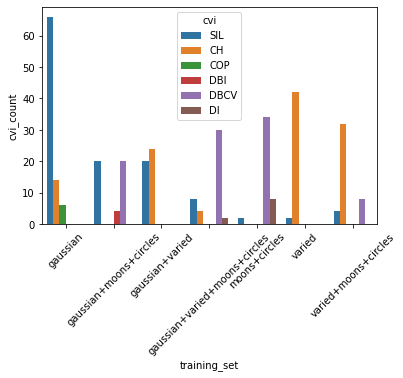

In [107]:
ax = sns.barplot(data=max_iter_results, x="training_set", hue="cvi", y="cvi_count")
plt.xticks(rotation=45)

In [51]:
max_iter_results.groupby(["training_set"])["m"].mean()

training_set
gaussian                          4.674419
gaussian+moons+circles            9.772727
gaussian+varied                   6.500000
gaussian+varied+moons+circles     9.590909
moons+circles                    25.809524
varied                            7.409091
varied+moons+circles              9.363636
Name: m, dtype: float64

In [19]:
max_iter_results[["Method", "dataset", "iteration", "run", "training_set"]]

,Method,dataset,iteration,run,training_set
349,effens,Fashion-MNIST_n10000_f784_c10.csv,70,0,gaussian
3975,effens,Fashion-MNIST_n10000_f784_c10.csv,70,1,gaussian
7055,effens,Fashion-MNIST_n10000_f784_c10.csv,70,2,gaussian
419,effens,Fashion-MNIST_n20000_f784_c10.csv,70,0,gaussian
489,effens,Fashion-MNIST_n30000_f784_c10.csv,70,0,gaussian
...,...,...,...,...,...
46796,ml2dac,wisc.csv,70,1,varied+moons+circles
43786,ml2dac,yeast.csv,70,0,varied+moons+circles
46866,ml2dac,yeast.csv,70,1,varied+moons+circles
43856,ml2dac,zoo.csv,70,0,varied+moons+circles


In [121]:
max_iter_results.groupby(["training_set", "Method"])["Best NMI", "Best ARI", "wallclock time", "max_iteration"].mean().round(1)

<ipython-input-121-5ac7c958f8ef>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  max_iter_results.groupby(["training_set", "Method"])["Best NMI", "Best ARI", "wallclock time", "max_iteration"].mean().round(1)


Best NMI  Best ARI  wallclock time  \
training_set                  Method                                       
gaussian                      effens      34.3      22.9           440.5   
                              ml2dac      28.7      18.6          1904.9   
gaussian+moons+circles        effens      36.4      23.3           445.8   
                              ml2dac      31.3      19.6          1952.2   
gaussian+varied               effens      33.8      24.1           611.4   
                              ml2dac      30.1      18.9          1858.1   
gaussian+varied+moons+circles effens      41.6      26.3           290.1   
                              ml2dac      45.0      30.3          1837.3   
moons+circles                 effens      43.9      25.3          1458.4   
                              ml2dac      30.1      20.0          1874.4   
varied                        effens      36.5      25.7           269.8   
                              ml2dac      38.4      27.8          1599.0   
varied+moons+circles          effens      34.4      23.8            63.4   
                              ml2dac      38.7      25.6          1669.4   

                                      max_iteration  
training_set                  Method                 
gaussian                      effens           70.0  
                              ml2dac           59.5  
gaussian+moons+circles        effens           70.0  
                              ml2dac           59.4  
gaussian+varied               effens           70.0  
                              ml2dac           59.6  
gaussian+varied+moons+circles effens           70.0  
                              ml2dac           59.6  
moons+circles                 effens           63.9  
                              ml2dac           59.4  
varied                        effens           70.0  
                              ml2dac           62.5  
varied+moons+circles          effens           70.0  
                              ml2dac           62.4

In [19]:
result[(result["iteration"] == 70) &(result["dataset"] == "Fashion-MNIST_n20000_f784_c10.csv")].groupby(["training_set", "Method"])["Best NMI", "Best ARI", "wallclock time", "max_iteration"].mean().round(1)

<ipython-input-19-1704e792320e>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  result[(result["iteration"] == 70) &(result["dataset"] == "Fashion-MNIST_n20000_f784_c10.csv")].groupby(["training_set", "Method"])["Best NMI", "Best ARI", "wallclock time", "max_iteration"].mean().round(1)


Best NMI  Best ARI  wallclock time  \
training_set           Method                                       
gaussian               effens      24.9      11.8           669.0   
gaussian+moons+circles effens      20.0       8.2           686.4   
gaussian+varied        effens      24.9      11.8           684.2   
moons+circles          effens      40.6      17.1          2102.3   
                       ml2dac      -0.0       0.0          6664.0   
varied                 effens      24.9      11.8           412.1   
                       ml2dac      18.7       9.1          3798.9   
varied+moons+circles   effens      15.2       7.3            15.0   
                       ml2dac      21.3      10.3          4761.8   

                               max_iteration  
training_set           Method                 
gaussian               effens           70.0  
gaussian+moons+circles effens           70.0  
gaussian+varied        effens           70.0  
moons+circles          effens           70.0  
                       ml2dac           70.0  
varied                 effens           70.0  
                       ml2dac           70.0  
varied+moons+circles   effens           70.0  
                       ml2dac           70.0

In [26]:
result_per_training_set = max_iter_results.groupby(["training_set", "Method"])["Best NMI", "Best ARI", "wallclock time", "max_iteration"].mean().round(1)

<ipython-input-26-20c0e66eea08>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  result_per_training_set = max_iter_results.groupby(["training_set", "Method"])["Best NMI", "Best ARI", "wallclock time", "max_iteration"].mean().round(1)


In [9]:
order = ['gaussian', 'gaussian+moons+circles', 'gaussian+varied',
       'gaussian+varied+moons+circles', 'moons+circles', 'varied',
       'varied+moons+circles']

array(['gaussian', 'gaussian+moons+circles', 'gaussian+varied',
       'gaussian+varied+moons+circles', 'moons+circles', 'varied',
       'varied+moons+circles'], dtype=object)

In [30]:
print(pd.pivot_table(result_per_training_set, 
               index=["training_set"],
               columns=["Method"],
               values=["Best NMI", "Best ARI"]).to_latex())

\begin{tabular}{lrrrr}
\toprule
{} & \multicolumn{2}{l}{Best ARI} & \multicolumn{2}{l}{Best NMI} \\
Method &   effens & ml2dac &   effens & ml2dac \\
training\_set                  &          &        &          &        \\
\midrule
gaussian                      &     25.8 &   17.4 &     38.2 &   25.8 \\
gaussian+moons+circles        &     26.9 &   17.1 &     40.8 &   26.4 \\
gaussian+varied               &     27.6 &   19.4 &     36.5 &   29.1 \\
gaussian+varied+moons+circles &     29.8 &   31.6 &     44.0 &   44.1 \\
moons+circles                 &     26.2 &   23.3 &     43.8 &   33.7 \\
varied                        &     29.1 &   26.2 &     37.8 &   35.7 \\
varied+moons+circles          &     29.0 &   26.3 &     38.3 &   38.4 \\
\bottomrule
\end{tabular}



In [67]:
for training_set in training_sets:
    print(f"Training set {training_set}:")
    print(max_iter_results[max_iter_results["training_set"] == training_set]["cf"].value_counts())
    #print(max_iter_results[max_iter_results["training_set"] == training_set])
    print("------------------------")

Training set gaussian:
ACV     21
MCLA     1
Name: cf, dtype: int64
------------------------
Training set gaussian+moons+circles:
ACV     21
MCLA     1
Name: cf, dtype: int64
------------------------
Training set gaussian+varied:
ACV     19
QMI      2
MCLA     1
Name: cf, dtype: int64
------------------------
Training set moons+circles:
ACV    22
Name: cf, dtype: int64
------------------------
Training set varied:
ACV     21
MCLA     1
Name: cf, dtype: int64
------------------------
Training set varied+moons+circles:
ACV     20
QMI      1
MCLA     1
Name: cf, dtype: int64
------------------------


In [68]:
result[result["iteration"] == 70].groupby(["training_set", "Method"])["Best NMI", "wallclock time", "max_iteration"].mean().round(1)

<ipython-input-68-6a5f91e1c882>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  result[result["iteration"] == 70].groupby(["training_set", "Method"])["Best NMI", "wallclock time", "max_iteration"].mean().round(1)


Best NMI  wallclock time  max_iteration
training_set           Method                                         
gaussian               effens      38.6            90.3           70.0
                       ml2dac      25.2           289.7           70.0
gaussian+moons+circles effens      41.1            90.2           70.0
                       ml2dac      28.6           306.8           70.0
gaussian+varied        effens      36.0            57.5           70.0
                       ml2dac      27.1           203.5           70.0
moons+circles          effens      44.0           193.6           70.0
                       ml2dac      30.9           275.0           70.0
varied                 effens      37.5            70.2           70.0
                       ml2dac      36.6           143.8           70.0
varied+moons+circles   effens      38.6            71.3           70.0
                       ml2dac      37.0           147.6           70.0